On importe les bibliothèques.

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split


Lecture du fichier

In [274]:
df= pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [275]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Vérification s'il y a des données manquantes

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


On regroupe les métiers par catégories

In [220]:
"""def encode_metier_case(occupation):
    if occupation in ["Software Engineer", "Scientist", "Engineer"]:
        return "Technique"
    elif occupation in ["Doctor", "Nurse", "Pharmacist"]:
        return "Sante"
    elif occupation in ["Teacher", "Professor"]:
        return "Education"
    elif occupation in ["Lawyer", "Salesperson", "Accountant", "Manager", "Sales Representative"]:
        return "Commerce"
    else:
        return "Autre"""


'def encode_metier_case(occupation):\n    if occupation in ["Software Engineer", "Scientist", "Engineer"]:\n        return "Technique"\n    elif occupation in ["Doctor", "Nurse", "Pharmacist"]:\n        return "Sante"\n    elif occupation in ["Teacher", "Professor"]:\n        return "Education"\n    elif occupation in ["Lawyer", "Salesperson", "Accountant", "Manager", "Sales Representative"]:\n        return "Commerce"\n    else:\n        return "Autre'

In [221]:
#df['Occupation'] = df['Occupation'].apply(encode_metier_case)

In [277]:
le = LabelEncoder()
df['Occupation'] = le.fit_transform(df['Occupation'])

On sépare les données composées de blood presure en deux colonnes séparées

In [278]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

df.drop(columns=['Blood Pressure'], inplace=True)




In [279]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,9,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,1,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,1,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,6,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,6,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,5,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,5,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,5,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,5,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


on met le genre en valeur binaire 

In [280]:
df = pd.get_dummies(df, columns=['Gender'],drop_first=True)
df['Gender_Male'] = df['Gender_Male'] * 1
df

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Gender_Male
0,1,27,9,6.1,6,42,6,Overweight,77,4200,NaN,126,83,1
1,2,28,1,6.2,6,60,8,Normal,75,10000,NaN,125,80,1
2,3,28,1,6.2,6,60,8,Normal,75,10000,NaN,125,80,1
3,4,28,6,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,1
4,5,28,6,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,5,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,0
370,371,59,5,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,0
371,372,59,5,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,0
372,373,59,5,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,0


on met notre variable sous forme binaire

In [281]:
df['BMI_binary'] = (df['BMI Category'] == 'Normal').astype(int)
df.drop(columns=['BMI Category'], inplace=True)
df

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Gender_Male,BMI_binary
0,1,27,9,6.1,6,42,6,77,4200,NaN,126,83,1,0
1,2,28,1,6.2,6,60,8,75,10000,NaN,125,80,1,1
2,3,28,1,6.2,6,60,8,75,10000,NaN,125,80,1,1
3,4,28,6,5.9,4,30,8,85,3000,Sleep Apnea,140,90,1,0
4,5,28,6,5.9,4,30,8,85,3000,Sleep Apnea,140,90,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,5,8.1,9,75,3,68,7000,Sleep Apnea,140,95,0,0
370,371,59,5,8.0,9,75,3,68,7000,Sleep Apnea,140,95,0,0
371,372,59,5,8.1,9,75,3,68,7000,Sleep Apnea,140,95,0,0
372,373,59,5,8.1,9,75,3,68,7000,Sleep Apnea,140,95,0,0


 Encoder Sleep Disorder en colonnes binaires (one-hot)


In [282]:
df_encoded = pd.get_dummies(df, columns=['Sleep Disorder'], dummy_na=True, drop_first=False)

KNN pour les valeurs manquantes 

In [297]:
from sklearn.impute import KNNImputer
import pandas as pd

sleep_cols = [col for col in df_encoded.columns if 'Sleep Disorder_' in col]
def data_imputation(df, cols):
    df_imputed = df.copy()
    imputer = KNNImputer(n_neighbors=5)
    df_imputed[cols] = imputer.fit_transform(df_imputed[cols])
    df_imputed[cols] = df_imputed[cols].round().astype(int)
    
    return df_imputed
df_imputed = data_imputation(df_encoded, sleep_cols)
df = df_imputed

df

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Gender_Male,BMI_binary,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_nan
0,1,27,9,6.1,6,42,6,77,4200,126,83,1,0,0,0,1
1,2,28,1,6.2,6,60,8,75,10000,125,80,1,1,0,0,1
2,3,28,1,6.2,6,60,8,75,10000,125,80,1,1,0,0,1
3,4,28,6,5.9,4,30,8,85,3000,140,90,1,0,0,1,0
4,5,28,6,5.9,4,30,8,85,3000,140,90,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,5,8.1,9,75,3,68,7000,140,95,0,0,0,1,0
370,371,59,5,8.0,9,75,3,68,7000,140,95,0,0,0,1,0
371,372,59,5,8.1,9,75,3,68,7000,140,95,0,0,0,1,0
372,373,59,5,8.1,9,75,3,68,7000,140,95,0,0,0,1,0


In [298]:
"""def min_max_scaling_sleep(df):
    scaler = MinMaxScaler()

    # Colonnes à ne pas scaler (catégorielles ou identifiants)
    exclude_cols = ['Person ID', 'Gender', 'BMI Category', 'Sleep Disorder']

    num_cols = [col for col in df.columns if col not in exclude_cols]
    df_scaled = df.copy()
    df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

    return df_scaled


df_normalized = min_max_scaling_sleep(df)

df= df_normalized
df"""

"def min_max_scaling_sleep(df):\n    scaler = MinMaxScaler()\n\n    # Colonnes à ne pas scaler (catégorielles ou identifiants)\n    exclude_cols = ['Person ID', 'Gender', 'BMI Category', 'Sleep Disorder']\n\n    num_cols = [col for col in df.columns if col not in exclude_cols]\n    df_scaled = df.copy()\n    df_scaled[num_cols] = scaler.fit_transform(df[num_cols])\n\n    return df_scaled\n\n\ndf_normalized = min_max_scaling_sleep(df)\n\ndf= df_normalized\ndf"

In [299]:
X = df.drop(columns=[BMI_binary'])
y = df['BMI_binary']

SyntaxError: unterminated string literal (detected at line 1) (2244483492.py, line 1)

In [285]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Occupation,374.0,3.772727,3.056081,0.0,1.00,3.0,5.0,10.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0
Systolic_BP,374.0,128.553476,7.748118,115.0,125.00,130.0,135.0,142.0
Diastolic_BP,374.0,84.649733,6.161611,75.0,80.00,85.0,90.0,95.0


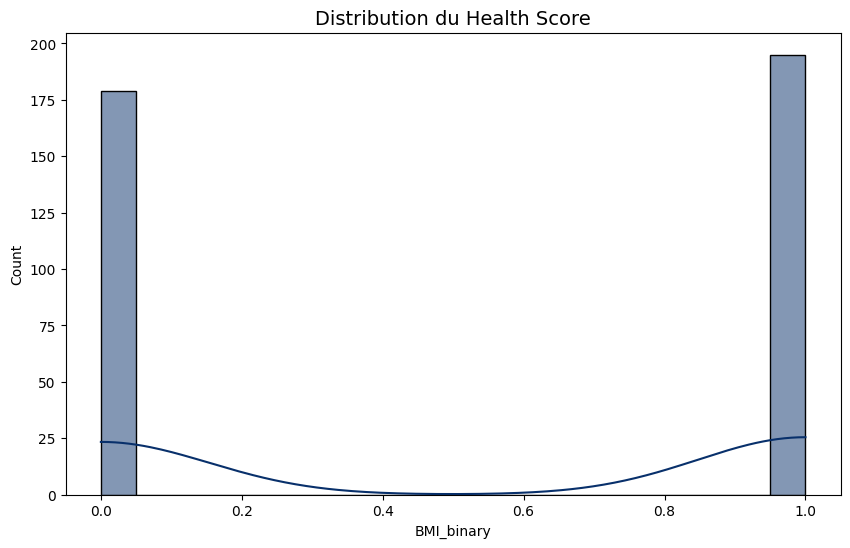

In [300]:
#distribution du health score 
plt.figure(figsize=(10,6))
sns.histplot(y,bins=20,color=plt.cm.Blues(1.0),edgecolor="black",kde=True)
plt.title('Distribution du Health Score', fontsize=14)
plt.show()

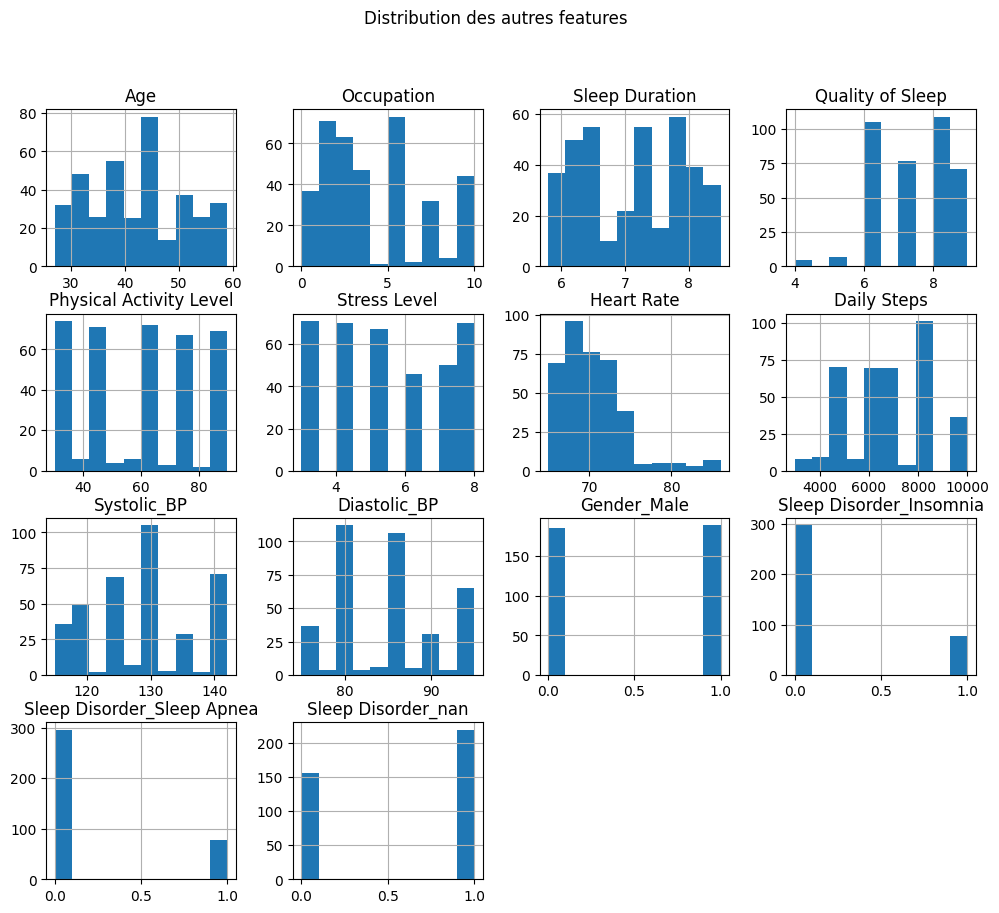

In [301]:
X.hist(figsize=(12,10))
plt.suptitle('Distribution des autres features')
plt.show()

In [302]:
df['BMI_binary'].value_counts(normalize=True)


BMI_binary
1    0.52139
0    0.47861
Name: proportion, dtype: float64

In [303]:
columns = X.columns
X = pd.DataFrame(X, columns=columns)

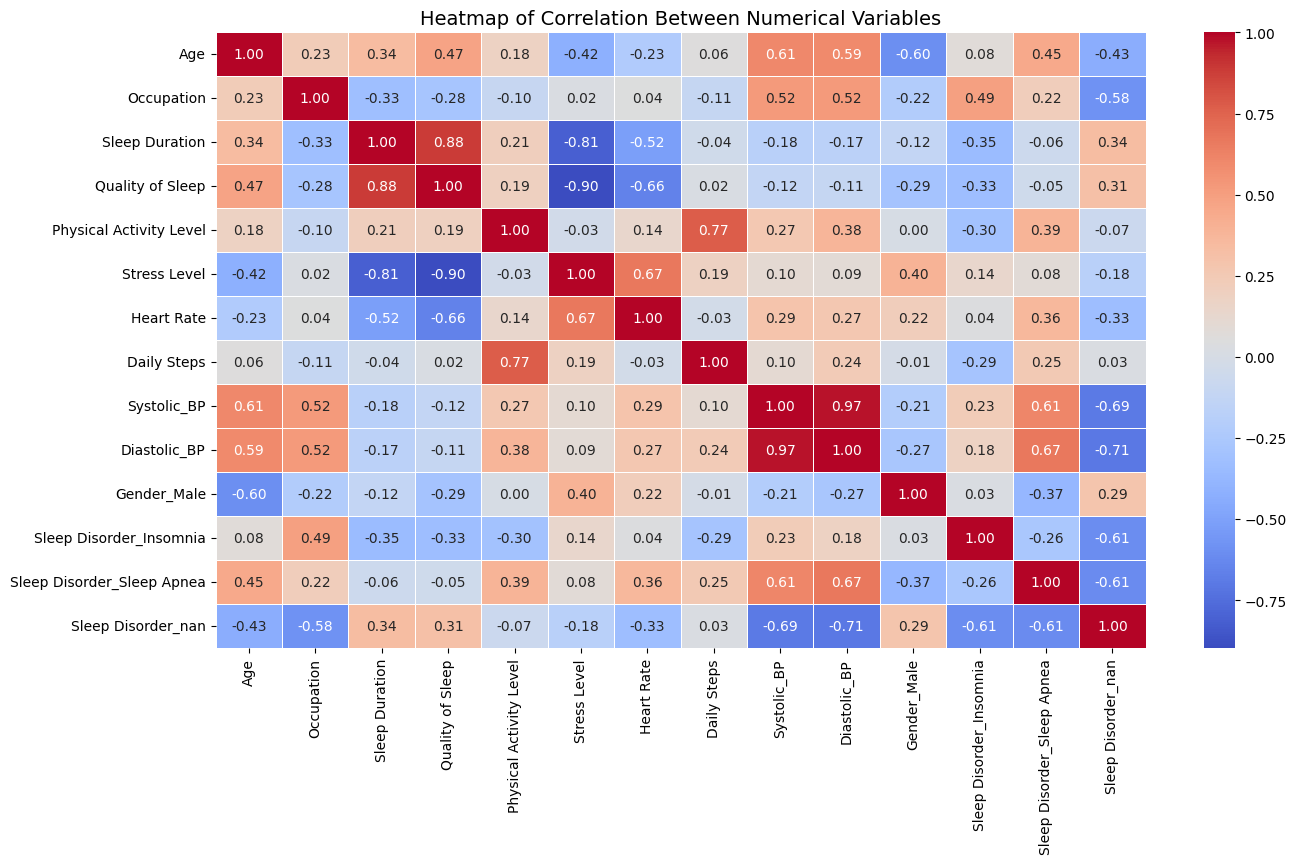

In [304]:
colmns = X.select_dtypes(include=['number'])
corr = colmns.corr()
plt.figure(figsize=(15, 8))  
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Between Numerical Variables", fontsize=14)
plt.show()

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 0, stratify=y)

Régression linéaire

In [306]:
model = LogisticRegression(max_iter=200)

In [307]:
model.fit(X_train, y_train)

C:\Users\User\Desktop\doc\ml-tp-classification-Ghenimaa\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [308]:
y_pred = model.predict(X_test)

In [309]:
print(" Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print("\n Rapport de classification :\n", classification_report(y_test, y_pred))

 Accuracy : 0.92

 Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       0.87      1.00      0.93        39

    accuracy                           0.92        75
   macro avg       0.93      0.92      0.92        75
weighted avg       0.93      0.92      0.92        75

